In [1]:
include("AudioNMF.jl");
using .AudioNMF

In [2]:
using Plots;
using Statistics;

In [3]:
V,S = audio_to_V("data/tetris_piano_poly.wav");

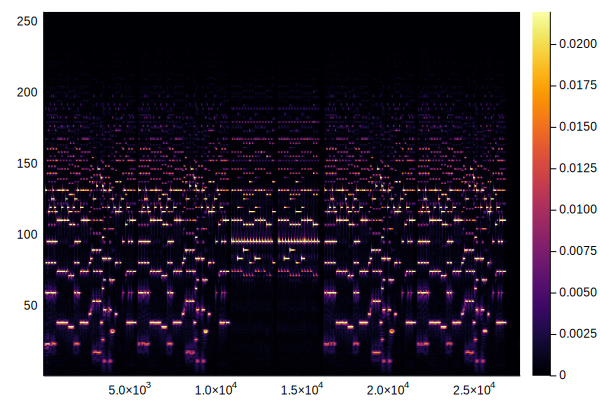

In [4]:
q = quantile(vec(V),0.99);
heatmap(V, clims = (0,q))

In [5]:
num_components = 256;
W, H = nmf(V,num_components,2048);
W,H,W2,H2 = rearrange_components(W,H);

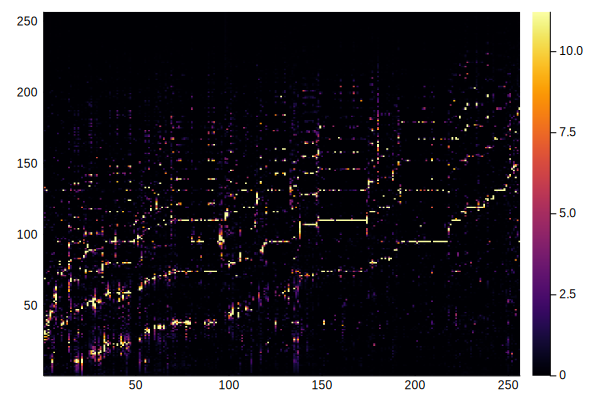

In [6]:
q = quantile(vec(W),0.99);
heatmap(W, clims = (0,q))

In [7]:
split = floor(Int64,num_components/2);
ind1 = 1:split
ind2 = (split+1):num_components;

V1 = W[:,ind1]*H[ind1,:];
V2 = W[:,ind2]*H[ind2,:];

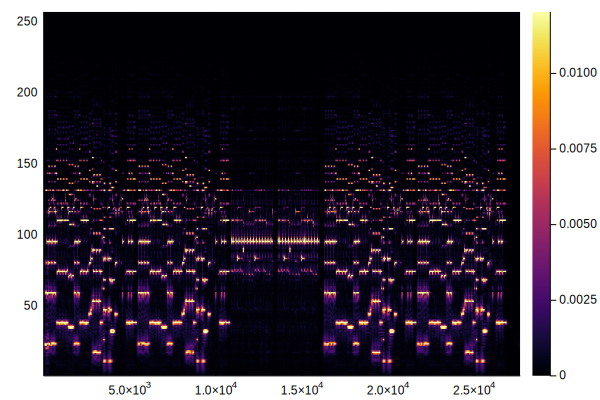

In [8]:
q = quantile(vec(V1),0.99);
heatmap(V1, clims = (0,q))

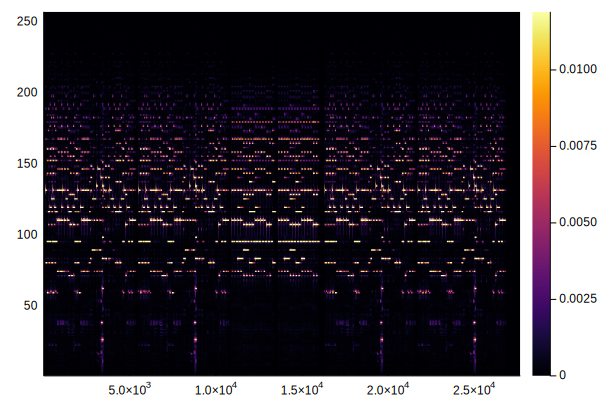

In [9]:
q = quantile(vec(V2),0.99);
heatmap(V2, clims = (0,q))

In [10]:
S1 = copy(S);
S2 = copy(S);

In [11]:
V_to_audio(V1,S1,"test1.wav")
V_to_audio(V2,S2,"test2.wav")